<a href="https://colab.research.google.com/github/Soham-Kakkar/ML-practice/blob/main/lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data  = pd.read_csv('data.csv')

In [ ]:
data[data.columns[0]] = data[data.columns[0]].astype(float)
data[data.columns[1]] = data[data.columns[1]].astype(float)

x_label = data.columns[0]
y_label = data.columns[1]

x_min = data[x_label].min()
x_max = data[x_label].max()
y_min = data[y_label].min()
y_max = data[y_label].max()

data[x_label] = (data[x_label] - x_min) / (x_max - x_min)
data[y_label] = (data[y_label] - y_min) / (y_max - y_min)


In [ ]:
def loss(m , b , points):
  total_err = 0;
  for i in range(len(points)):
    x = points.iloc[i].year
    y = points.iloc[i].income
    total_err += (y-(m*x + b))**2
  total_err / float(len(points))

In [ ]:
def grad_descent(m, b, points, l):
    grad_m = 0
    grad_b = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i][x_label]
        y = points.iloc[i][y_label]
        grad_m += (2 / n) * (y - (m * x + b)) * (-x)
        grad_b += (2 / n) * (y - (m * x + b)) * (-1)

    m_new = m - l * grad_m
    b_new = b - l * grad_b
    return m_new, b_new

In [ ]:
m = 0
b = 0
l = 0.15
epochs = 1100

In [ ]:
for i in range(epochs):
    m, b = grad_descent(m, b, data, l)

print(f"Final normalized m: {m}, Final normalized b: {b}")

m_original = m * (y_max - y_min) / (x_max - x_min)
b_original = b * (y_max - y_min) + y_min - m_original * x_min

print(f"Final original m: {m_original}, Final original b: {b_original}")

Final normalized m: 0.9702683289999103, Final normalized b: -0.0899723366464671
Final original m: 828.465075142966, Final original b: -1632210.7576963922


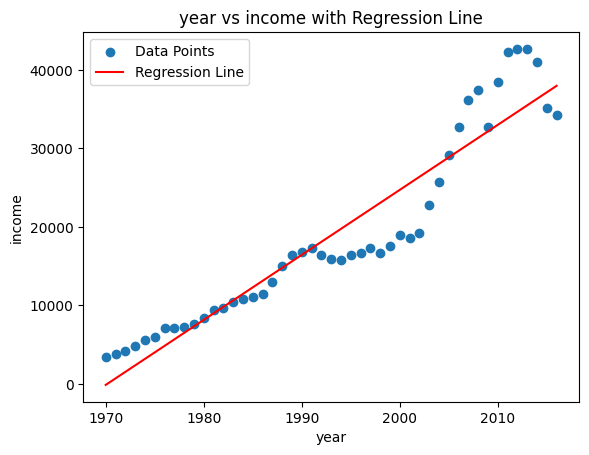

In [ ]:
plt.scatter(data[x_label] * (x_max - x_min) + x_min,
            data[y_label] * (y_max - y_min) + y_min,
            label='Data Points')

x_vals = np.linspace(x_min, x_max, len(data[x_label]))
y_vals = m_original * x_vals + b_original

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'{x_label} vs {y_label} with Regression Line')
plt.legend()
